#Data Science I : Fundamentos para la Ciencia de Datos

#Fecha: 19/07/2024

# Metadata

## Acerca de la base de datos:
- En el campo de la ciencia de datos que va en rápida evolución, comprender las tendencias y patrones de los salarios es crucial tanto para los profesionales como para las organizaciones. Este conjunto de datos tiene como objetivo arrojar luz sobre el panorama de los salarios en ciencia de datos de 2020 a 2024. Al analizar los datos salariales durante este período, los entusiastas de los datos, los investigadores y los profesionales de la industria pueden obtener información valiosa sobre las tendencias salariales, las variaciones regionales y los factores potenciales que influyen en la compensación. dentro de la comunidad de ciencia de datos.

# Variables

- job_title: El puesto de trabajo o función asociada con el salario informado.
- experience_level: El nivel de experiencia del individuo.
- employment_type: Indica si el empleo es a tiempo completo, a tiempo parcial, etc.
- work_models: Describe diferentes modelos de trabajo (remoto, presencial, híbrido).
- work_year: El año específico en el que se registró la información salarial.
- employee_residence: El lugar de residencia del empleado.
- salary: El salario informado en la moneda original.
- salary_currency: La moneda en la que está denominado el salario.
- salary_in_usd: El salario convertido en dólares estadounidenses.
- company_location: La ubicación geográfica de la organización empleadora.
- company_size: El tamaño de la empresa, categorizado por el número de empleados.

# Importación de librerias

In [89]:
# Importación pandas para la estrcuturación de datos
import pandas as pd

# Importación NumPy para funcones matematica
import numpy as np

# Importación Matplotlib para la visualización
import matplotlib.pyplot as plt

# Importación de Seaborn para visualización avanzada
import seaborn as sns

# Importación DataSet

In [90]:
# Conectadmos el Google Colab con Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importamos el conjunto de datos seleccionado asignandolo a la variable df
df = pd.read_csv('/content/gdrive/MyDrive/CoderHouse/Datan Science/Ciencia de Datos I Fundamentos para la Ciencia de Datos/Datasets/data_science_salaries.csv', sep=',', encoding='latin-1')

# Pre-visualización del Dataframe

In [ ]:
# Utilizamos el método head para visualizar las primeras cinco filas del df
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [ ]:
# Utilizamos el método shape para observar la dimensionalidad de nuestro dataset
df.shape

(6599, 11)

- Observamos que el conjunto de datos contien 6599 filas y 11 columnas.

In [ ]:
# Imprimimos las ultimas cinco filas del df
df.tail()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large
6598,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small


In [ ]:
# Utilizamos el método columns para imprimir todas las columnas de nuestro df
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Con el método info observamos los datos no nulos y verificamos si existen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


- En esta conjunto de datos no se presentan datos nulos.

In [ ]:
# Utilizamos el método describe para hacer un resumen de analisis estadistico del df
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


# Renombramiento de columnas

In [ ]:
# Renombraremos las columnas del df
# Creamos un diccionario al que le pasaremos el nombre de las columnas del dataframe como llaves
# Los nombres nuevos de las columnas se las pasaremos como los valores
columnas_renombradas = {'job_title' : 'puesto_de_trabajo', 'experience_level' : 'experiencia_laboral', 'employment_type' : 'carga_horaria', 'work_models' : 'tipo_de_trabajo',
                        'work_year' : 'año_info_salarial', 'employee_residence' : 'lugar_de_trabajo', 'salary' : 'salario_de_origen', 'salary_currency' : 'tipo_de_moneda',
                        'salary_in_usd' : 'salario_en_dolares', 'company_location' : 'ubicacion_empresa', 'company_size' : 'tamaño_empresa'}

In [ ]:
# Utilizamos el método rename para renombrar
# llamamos a df le pasamos el método rename y los argumentos que deseamos renombrar, en este caso columns
# a columns le asignamos el diccionario con los nombres nuevos
# Utilizamos el arguemto inplace=True para cambiar directamnete el df original
df.rename(columns=columnas_renombradas, inplace=True)

In [ ]:
# Verificamos si se realizaron los cambios con el codigo head
df.head()

,puesto_de_trabajo,experiencia_laboral,carga_horaria,tipo_de_trabajo,año_info_salarial,lugar_de_trabajo,salario_de_origen,tipo_de_moneda,salario_en_dolares,ubicacion_empresa,tamaño_empresa
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


# Verificación de datos nulos

In [ ]:
suma_de_datos_nulos = df.isnull().sum()
suma_de_datos_nulos

puesto_de_trabajo      0
experiencia_laboral    0
carga_horaria          0
tipo_de_trabajo        0
año_info_salarial      0
lugar_de_trabajo       0
salario_de_origen      0
tipo_de_moneda         0
salario_en_dolares     0
ubicacion_empresa      0
tamaño_empresa         0
dtype: int64

- No se observan datos nulos.

# EDA - Análisis exploratorio de los datos

In [ ]:
# Imprimimos las columnas para guiarnos
df.columns

Index(['puesto_de_trabajo', 'experiencia_laboral', 'carga_horaria',
       'tipo_de_trabajo', 'año_info_salarial', 'lugar_de_trabajo',
       'salario_de_origen', 'tipo_de_moneda', 'salario_en_dolares',
       'ubicacion_empresa', 'tamaño_empresa'],
      dtype='object')

# Hipótesis:

- Los salarios en dólares de los profesionales de datos varían significativamente en función de la experiencia laboral y el tipo de trabajo, y estos efectos pueden diferir según el tamaño y la ubicación de la empresa.

- Experiencia Laboral: Se espera que los profesionales con más experiencia laboral (e.g., Senior-level, Executive-level) reciban salarios más altos en comparación con aquellos en niveles más bajos (e.g., Entry-level, Mid-level).

- Tipo de Trabajo: Diferentes tipos de trabajos (e.g., Data Engineer, Data Scientist, BI Developer) pueden tener diferentes rangos salariales debido a la demanda de habilidades específicas y la naturaleza del trabajo.

- Tamaño de la Empresa: Las empresas más grandes pueden tener más recursos y, por lo tanto, pueden ofrecer salarios más altos en comparación con las empresas más pequeñas.



# Objetivo:

- Dado el crecimiento continuo y la demanda en la industria del análisis de datos, nuestro objetivo es predecir los salarios de las personas que comiencen a trabajar como Data Scientists en posiciones de entrada (entry-level) para los años 2025, 2026 y 2027. Buscamos proporcionar una visión precisa y fundamentada de las expectativas salariales futuras en este campo emergente.

# Univariado

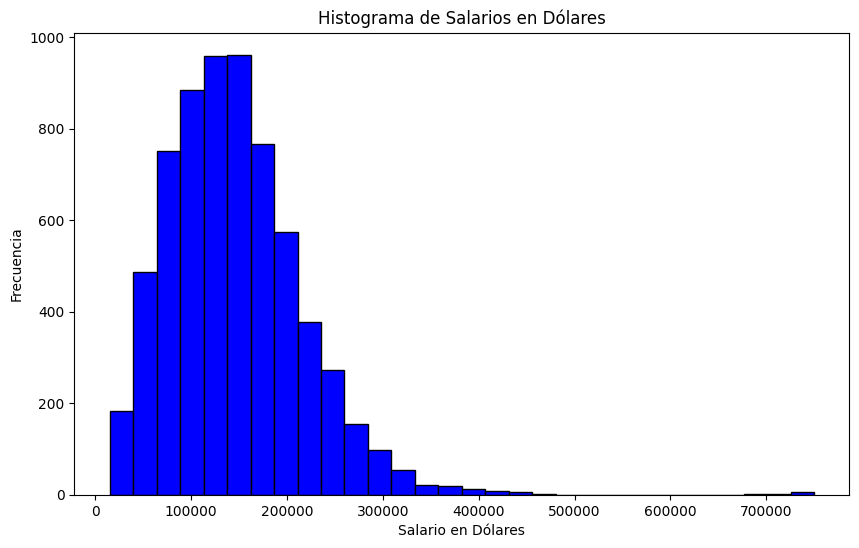

In [ ]:
# Histograma de la columna 'salario_en_dolares'

# Creamos una figura con un tamaño de 10x6 pulgadas.
plt.figure(figsize=(10, 6))

#Graficamos un histograma de la columna salario_en_dolares con 30 bins (barras).
plt.hist(df['salario_en_dolares'], bins=30, color='blue', edgecolor='black')

# Agregamos etiquetas y título al gráfico.
plt.title('Histograma de Salarios en Dólares')
plt.xlabel('Salario en Dólares')
plt.ylabel('Frecuencia')

# Mostramos el gráfico.
plt.show()

- Distribución de Salarios

Eje X (Salario en Dólares): Representa los salarios de los profesionales de datos en dólares.
Eje Y (Frecuencia): Indica cuántos profesionales tienen un salario en el rango específico representado por cada bin del histograma.

- Forma del Histograma

Centro y Dispersión: El histograma muestra cómo se distribuyen los salarios. Puedes observar dónde se concentra la mayoría de los salarios (centro) y qué tan dispersos están (amplitud de la distribución).


- Barras (Bins)

Altura de las Barras: Cada barra representa el número de profesionales cuyos salarios caen dentro del rango específico de esa barra. Bins más altos indican una mayor concentración de salarios en ese rango.

- Conclusión

La asimetría del histograma está sesgado a la izquierda, sugiere que la mayoria de los profesionales ganan entrel USD 100.000 y USD 150.000.

<ipython-input-73-7d60d96a85f6>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['salario_en_dolares'], shade=True, color='green')


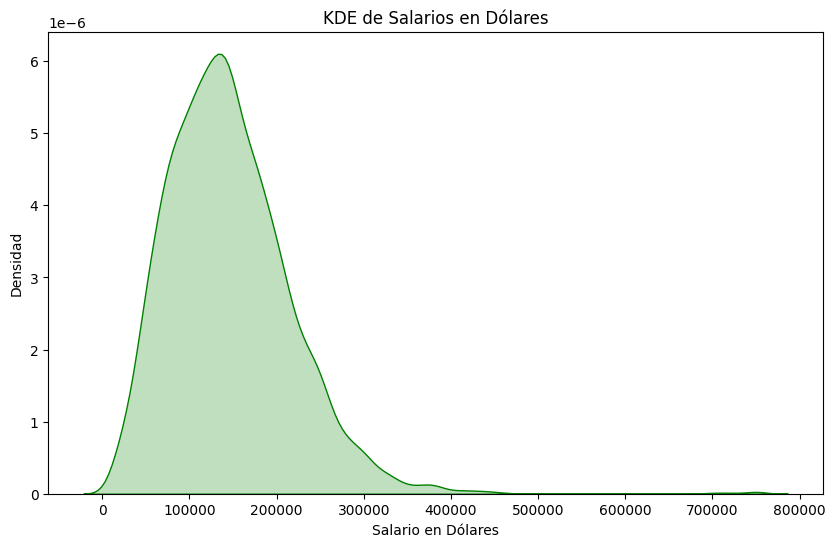

In [ ]:
# KDE de la columna 'salario_en_dolares'

# Creamos una figura con un tamaño de 10x6 pulgadas.
plt.figure(figsize=(10, 6))

# Graficamos un KDE (Kernel Density Estimation) de la columna salario_en_dolares con una línea suave y de color verde.
sns.kdeplot(df['salario_en_dolares'], shade=True, color='green')

# Agregamos etiquetas y título al gráfico.
plt.title('KDE de Salarios en Dólares')
plt.xlabel('Salario en Dólares')
plt.ylabel('Densidad')

# Mostramos el gráfico.
plt.show()


- Distribución Suavizada de Salarios

Eje X (Salario en Dólares): Representa los salarios de los profesionales de datos en dólares.
Eje Y (Densidad): Indica la densidad de la probabilidad de observar salarios en el rango específico del eje X. No es una frecuencia directa como en un histograma, sino una estimación de la probabilidad.

- Forma del KDE

Pico(s): Los picos en el KDE representan los rangos salariales más comunes. Un pico alto significa que muchos profesionales ganan salarios cercanos a ese valor.
Ancho de la Curva: El ancho de la curva muestra la dispersión de los salarios. Una curva más ancha indica una mayor variabilidad en los salarios.
Asimetría: es igual a la del histograma anterior

# Bivariado

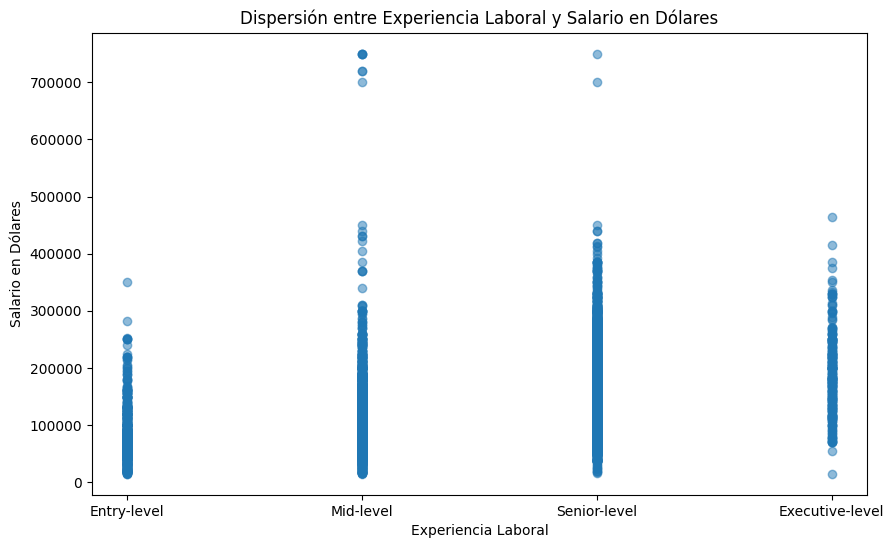

In [ ]:
# Creamos un diccionario para enumerar los niveles de experiencia laboral.
nivel_experiencia = {'Entry-level': 1, 'Mid-level': 2, 'Senior-level': 3, 'Executive-level': 4}

# Aplicamos la función map() para codificar los niveles de experiencia laboral y creamos una nueva columna
df['nivel_experiencia'] = df['experiencia_laboral'].map(nivel_experiencia)

# Gráfico de dispersión entre 'experiencia_laboral' y 'salario_en_dolares'

# Creamos una figura con un tamaño de 10x6 pulgadas.
plt.figure(figsize=(10, 6))

# Graficamos un gráfico de dispersión con la columna 'nivel_experiencia' en el eje x y la columna 'salario_en_dolares' en el eje y.
plt.scatter(df['nivel_experiencia'], df['salario_en_dolares'], alpha=0.5)

# Agregamos etiquetas y título al gráfico.
plt.title('Dispersión entre Experiencia Laboral y Salario en Dólares')
plt.xlabel('Experiencia Laboral')
plt.ylabel('Salario en Dólares')

#Configuramos las etiquetas del eje x para que muestren los niveles de experiencia.
plt.xticks(ticks=[1, 2, 3, 4], labels=['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])

# Mostramos el gráfico.
plt.show()


- Relación entre Variables

Eje X (Experiencia Laboral): Representa los niveles de experiencia laboral codificados numéricamente (1: Entry-level, 2: Mid-level, 3: Senior-level, 4: Executive-level).
Eje Y (Salario en Dólares): Muestra los salarios en dólares de los profesionales de datos.

- Dispersión de Puntos

Puntos de Datos: Cada punto en el gráfico representa a un profesional con un nivel de experiencia específico y su salario correspondiente.
Alpha (Transparencia): La transparencia de los puntos (alpha=0.5) permite visualizar mejor la densidad de los puntos, especialmente en áreas con muchos puntos superpuestos.

- Tendencias Generales

Patrones de Salario: Observando la dispersión de los puntos, podemos identificar si hay una tendencia de aumento de salarios con niveles crecientes de experiencia laboral.

- Conclusión

Lo que se observa es que entre mid-level, senior-level y executibe-level, no hay tanta diferencia en los salarios maximos, pero si se puede ver una concentracion mas pronunciada en lo que es senior-level.
En tanto entry-level se obersan los salario maximos mas bajos de todos.

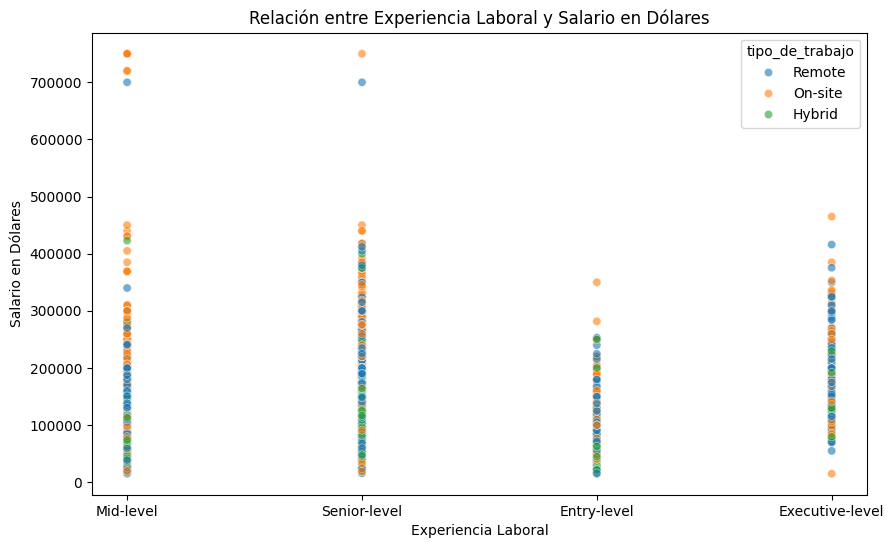

In [ ]:
# Relación entre 'experiencia_laboral' y 'salario_en_dolares' con scatter plot

# Creamos una figura con un tamaño de 10x6 pulgadas.
plt.figure(figsize=(10, 6))

# Creamos un scatter plot para experiencia_laboral y salario_en_dolares usando Seaborn, diferenciando por tipo_de_trabajo (hue) y ajustando la transparencia de los puntos (alpha=0.6).
sns.scatterplot(x='experiencia_laboral', y='salario_en_dolares', data=df, hue='tipo_de_trabajo', alpha=0.6)

#Añadimos un título y etiquetas para los ejes x (Experiencia Laboral) e y (Salario en Dólares).
plt.title('Relación entre Experiencia Laboral y Salario en Dólares')
plt.xlabel('Experiencia Laboral')
plt.ylabel('Salario en Dólares')

# Mostramos el gráfico.
plt.show()


- Relación entre Variables

Eje X (Experiencia Laboral): Representa los niveles de experiencia laboral. Las categorías podrían ser Entry-level, Mid-level, Senior-level, Executive-level.
Eje Y (Salario en Dólares): Muestra los salarios en dólares de los profesionales de datos

- Dispersión de Puntos

Puntos de Datos: Cada punto en el gráfico representa a un profesional con un nivel de experiencia específico y su salario correspondiente.
Alpha (Transparencia): La transparencia de los puntos (alpha=0.6) permite visualizar mejor la densidad de los puntos, especialmente en áreas con muchos puntos superpuestos.

- Coloración por Tipo de Trabajo

Hue (Tipo de Trabajo): Los diferentes colores de los puntos representan diferentes tipos de trabajo (tipo_de_trabajo). Esto permite visualizar cómo varía el salario no solo con la experiencia laboral, sino también con el tipo de trabajo.

- Conclusión

Se mantienen los patrones del grafico anterior, no se nota diferencia por el tipo de trabajo.

# Gráfico Libre

<Figure size 1200x800 with 0 Axes>

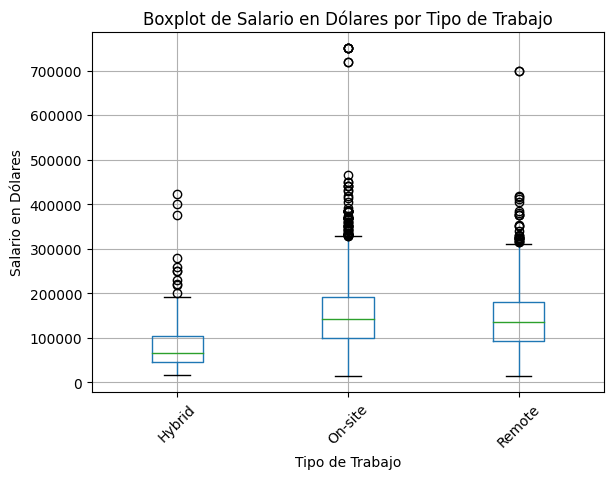

In [ ]:
# Boxplot de 'salario_en_dolares' por 'tipo_de_trabajo'

# Creamos una figura con un tamaño de 12x8 pulgadas.
plt.figure(figsize=(12, 8))

# Creamos un boxplot para la columna salario_en_dolares agrupado por tipo_de_trabajo.
df.boxplot(column='salario_en_dolares', by='tipo_de_trabajo')

#  Añadimos un título y etiquetas para los ejes x (Tipo de Trabajo) e y (Salario en Dólares). Quitamos el subtítulo por defecto y rotamos las etiquetas del eje x para una mejor legibilidad.
plt.title('Boxplot de Salario en Dólares por Tipo de Trabajo')
plt.suptitle('')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Salario en Dólares')
plt.xticks(rotation=45)

# Mostramos el gráfico.
plt.show()


-  Relación entre Variables

Eje X (Tipo de Trabajo): Representa los diferentes tipos de trabajo. Cada caja corresponde a un tipo de trabajo específico.
Eje Y (Salario en Dólares): Muestra los salarios en dólares de los profesionales de datos.

- Componentes del Boxplot

Caja: Representa el rango intercuartílico, que abarca del primer cuartil (Q1, 25%) al tercer cuartil (Q3, 75%) de los salarios.
Línea en la Caja (Mediana): La línea dentro de la caja indica la mediana (Q2, 50%) de los salarios.
Bigotes: Se extienden desde los cuartiles hasta el salario mínimo y máximo.
Outliers: Representan valores atípicos que están por fuera del rango intercuartílico.

- Conclusipon

Aqui podemos observar que los salarios mas altos estan en los trabajos que son presenciales y los mas bajos estan en lo que son híbridos.
Los puntos que se observan fuera de los bigotes son outliers.

<ipython-input-78-a1d338112d40>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='tamaño_empresa', y='salario_en_dolares', data=df, palette='pastel')


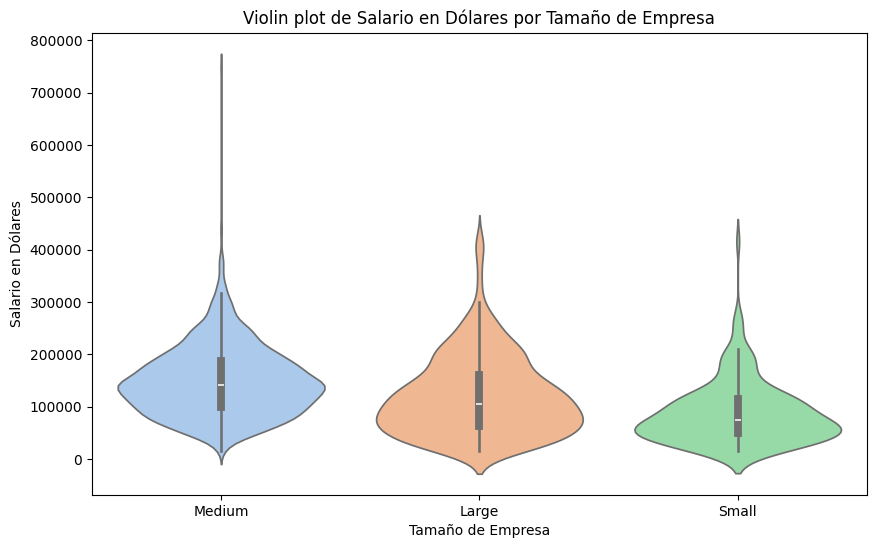

In [ ]:
# Violin plot de 'salario_en_dolares' por 'tamaño_empresa'

# Creamos una figura con un tamaño de 10x6 pulgadas.
plt.figure(figsize=(10, 6))

# Creamos un violin plot para salario_en_dolares agrupado por tamaño_empresa usando Seaborn y un esquema de color pastel.
sns.violinplot(x='tamaño_empresa', y='salario_en_dolares', data=df, palette='pastel')

# Añadimos un título y etiquetas para los ejes x (Tamaño de Empresa) e y (Salario en Dólares).
plt.title('Violin plot de Salario en Dólares por Tamaño de Empresa')
plt.xlabel('Tamaño de Empresa')
plt.ylabel('Salario en Dólares')

# Mostramos el gráfico.
plt.show()


-  Relación entre Variables

Eje X (Tamaño de Empresa): Representa los diferentes tamaños de empresa.
Eje Y (Salario en Dólares): Muestra los salarios en dólares de los profesionales de datos.

- Componentes del Violin Plot

Forma del Violin: La forma del gráfico muestra la distribución de los datos, similar a un boxplot pero con una estimación de densidad suavizada.
Distribución de Densidad: La anchura del violín en diferentes puntos del eje Y muestra la densidad de los datos. Las partes más anchas indican una mayor densidad de datos (más frecuencias), mientras que las partes más estrechas indican una menor densidad.
Boxplot Interno: A menudo, un boxplot interno proporciona una indicación adicional de la mediana y el rango intercuartílico.

- Conclusión

Mediante este grafico podemos ver que los salarios mas altos estan dentro de las empresas medianas y los mas bajos en las empresas chicas.

# Primeras conclusiones

Basándonos en el análisis de los datos recopilados y los gráficos elaborados, se pueden derivar las siguientes conclusiones respecto a nuestra hipótesis:

Entre los distintos niveles de experiencia (mid, senior, executive), las diferencias salariales no son tan pronunciadas. Sin embargo, el nivel entry presenta salarios significativamente más bajos.

En términos del tipo de modalidad de trabajo, los empleados que trabajan de forma presencial disfrutan de salarios algo superiores en comparación con aquellos que lo hacen de manera remota. Por otro lado, los empleados que adoptan la modalidad híbrida tienden a tener los salarios más bajos.

Respecto al tamaño de la empresa, la mayoría de los empleados parecen estar en empresas de tamaño mediano. Las diferencias salariales entre empleados de éstas y las empresas grandes no son significativas. No obstante, aquellos que trabajan en empresas pequeñas tienden a tener salarios más bajos.

# Data Wranling

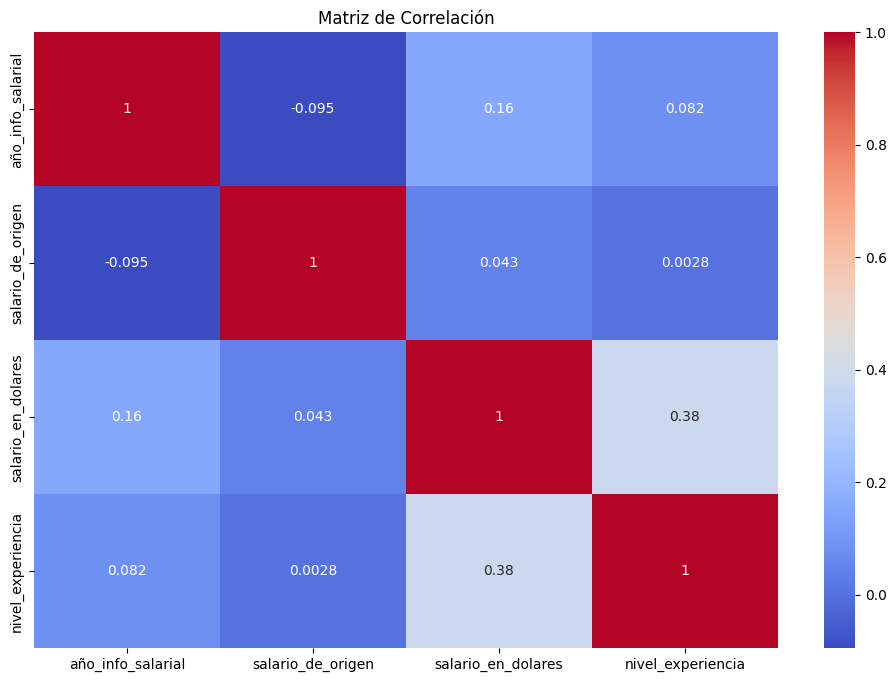

In [ ]:
# Selecciona solo las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = numerical_df.corr()

# Crea el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- Graficamos una matríz de correlación para tener una pimera vista sobre los datos numericos, lo que se puede observar es que ninguna de la variables tiene una fuerte correlacion entre ellas.

- Correlación Positiva (Cercana a 1):
Indica una relación lineal directa fuerte entre dos variables. A medida que una variable aumenta, la otra también tiende a aumentar.
- Correlación Negativa (Cercana a -1):
Indica una relación lineal inversa fuerte entre dos variables. A medida que una variable aumenta, la otra tiende a disminuir.
- Correlación Cero (Cercana a 0):
Indica que no hay una relación lineal entre las dos variables.

In [ ]:
# Eliminación de variables altamente correlacionadas
# Vamos a eliminar las variables que tengan una correlación mayor a 0.9
# Calcula la matriz de correlación
corr_matrix = numerical_df.corr()
threshold = 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(columns=to_drop)

if to_drop:
    df = df.drop(columns=to_drop)
    print(f'Variables eliminadas por alta correlación: {to_drop}')
else:
    print('No hay variables con alta correlación.')

No hay variables con alta correlación.


- Realizamos una segunda verificación utilizando este código que elimina las variables con alta correlación para reducir la multicolinealidad en el conjunto de datos. Sin embargo, confirmamos nuevamente que no hay alta correlación entre las variables numéricas, por lo tanto, no se elimina ninguna variable

# Manipulación de datos para llegar al objetivo

In [ ]:
# Creamos un nuevo DF eliminando las columnas que no son necesarias, ni relevantes para realizar nuestra predicción.
df2 = df.drop(['salario_de_origen', 'tipo_de_moneda'], axis=1)
df2.head()

,puesto_de_trabajo,experiencia_laboral,carga_horaria,tipo_de_trabajo,año_info_salarial,lugar_de_trabajo,salario_en_dolares,ubicacion_empresa,tamaño_empresa,nivel_experiencia
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium,2
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium,2
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium,3
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium,3
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,United States,Medium,2


In [ ]:
# Creamos un nuevo df quedandonos solamente con los Data Scientist
df_prediccion = df2[(df['puesto_de_trabajo'] == 'Data Scientist')]
df_prediccion.head()

,puesto_de_trabajo,experiencia_laboral,carga_horaria,tipo_de_trabajo,año_info_salarial,lugar_de_trabajo,salario_en_dolares,ubicacion_empresa,tamaño_empresa,nivel_experiencia
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium,3
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium,3
12,Data Scientist,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium,2
13,Data Scientist,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium,2
16,Data Scientist,Mid-level,Full-time,On-site,2024,United States,85000,United States,Medium,2


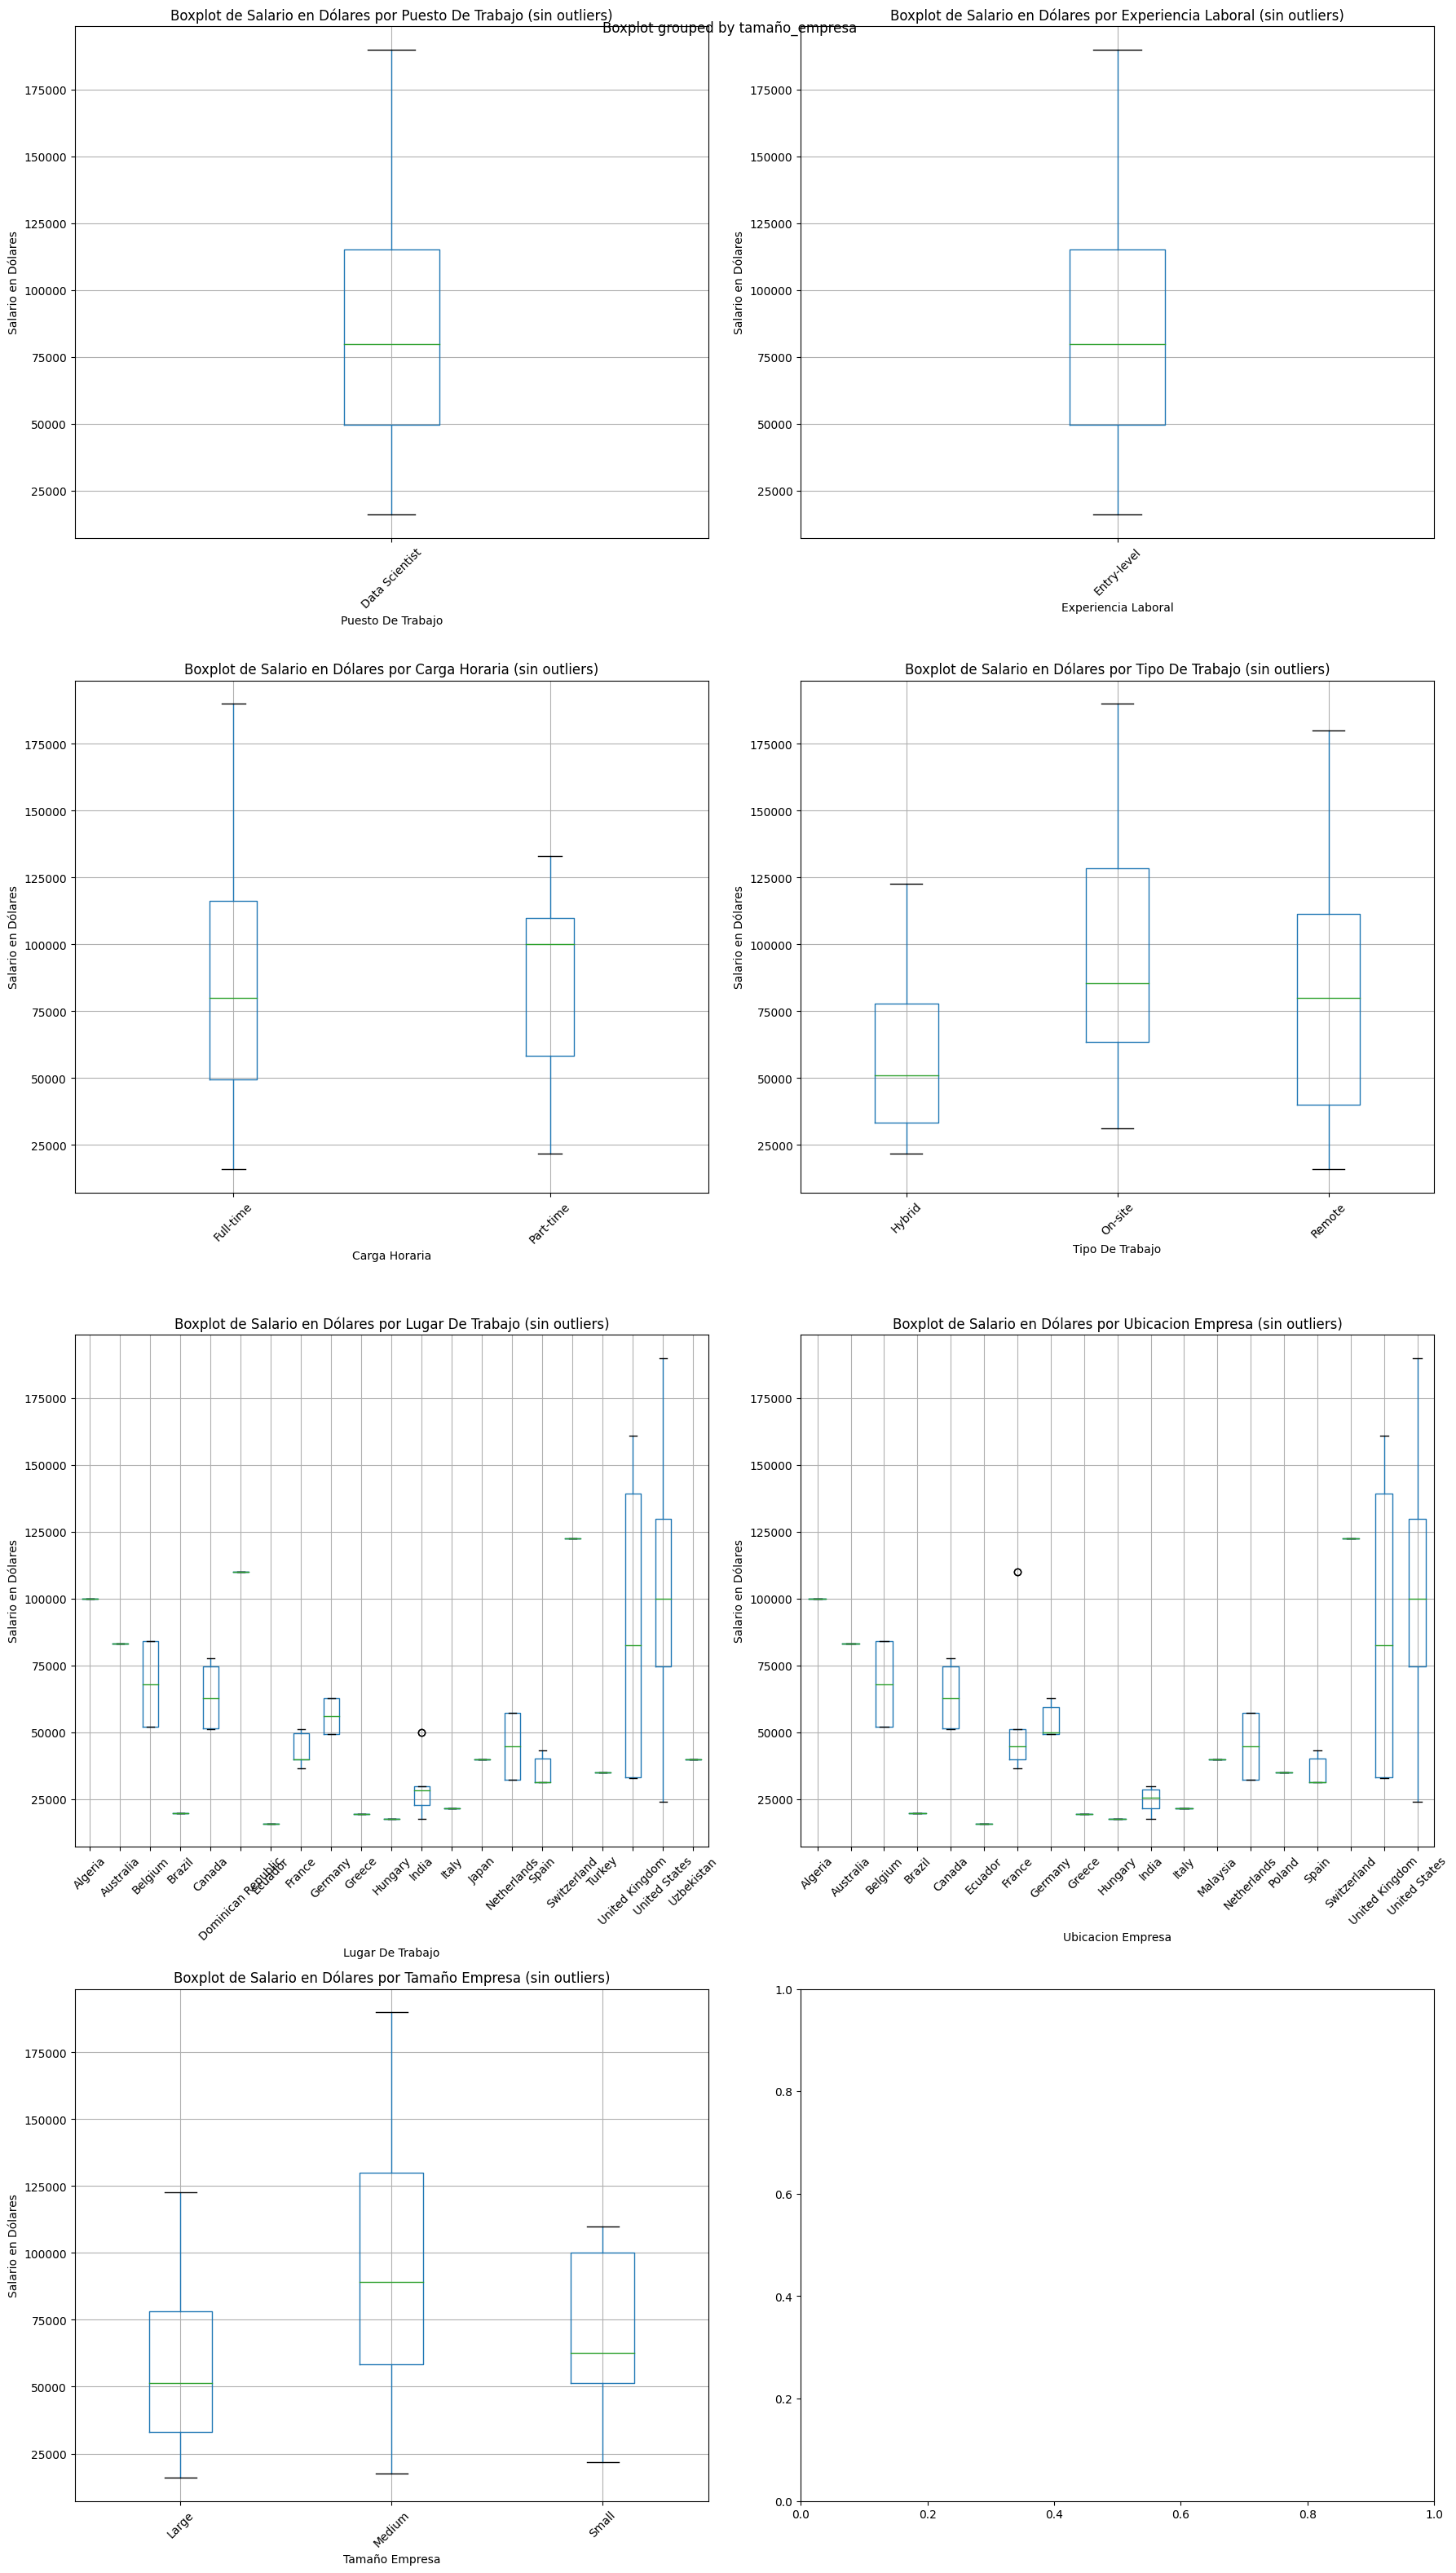

In [ ]:
# Reemplazamos los outliers por la mediana

# Función para reemplazar outliers con la mediana
def replace_outliers_with_median(df, column):
    median = df[column].median()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median
    return df

# Filtrar solo para Data Scientist y Entry-level
data_scientist_df = df_prediccion[df_prediccion['puesto_de_trabajo'] == 'Data Scientist'].copy()
entry_level_df = df_prediccion[df_prediccion['experiencia_laboral'] == 'Entry-level'].copy()

# Reemplazar outliers para cada categoría
categories = ['carga_horaria', 'tipo_de_trabajo', 'lugar_de_trabajo', 'ubicacion_empresa', 'tamaño_empresa']

for category in categories:
    data_scientist_df = replace_outliers_with_median(data_scientist_df, 'salario_en_dolares')
    entry_level_df = replace_outliers_with_median(entry_level_df, 'salario_en_dolares')

# Unir los DataFrames
df_cleaned = pd.concat([data_scientist_df, entry_level_df])

# Creamos otro df para filtrar por entry-level
df3 = df_cleaned[df_cleaned['experiencia_laboral'] == 'Entry-level']

# Crear gráficos separados para cada categoría
fig, axs = plt.subplots(4, 2, figsize=(18, 32))
axs = axs.flatten()

# Crear boxplots para cada categoría en Data Scientist
for i, category in enumerate(['puesto_de_trabajo', 'experiencia_laboral'] + categories):
    df3.boxplot(column='salario_en_dolares', by=category, ax=axs[i])
    axs[i].set_title(f'Boxplot de Salario en Dólares por {category.replace("_", " ").title()} (sin outliers)')
    axs[i].set_xlabel(category.replace('_', ' ').title())
    axs[i].set_ylabel('Salario en Dólares')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Ajustar el diseño para evitar la superposición de títulos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Machine Learning

In [ ]:
# Importamos los modulos necesarios de la librería Scikit-Learn.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
df3.columns

Index(['puesto_de_trabajo', 'experiencia_laboral', 'carga_horaria',
       'tipo_de_trabajo', 'año_info_salarial', 'lugar_de_trabajo',
       'salario_en_dolares', 'ubicacion_empresa', 'tamaño_empresa',
       'nivel_experiencia'],
      dtype='object')

# Importancia de los datos

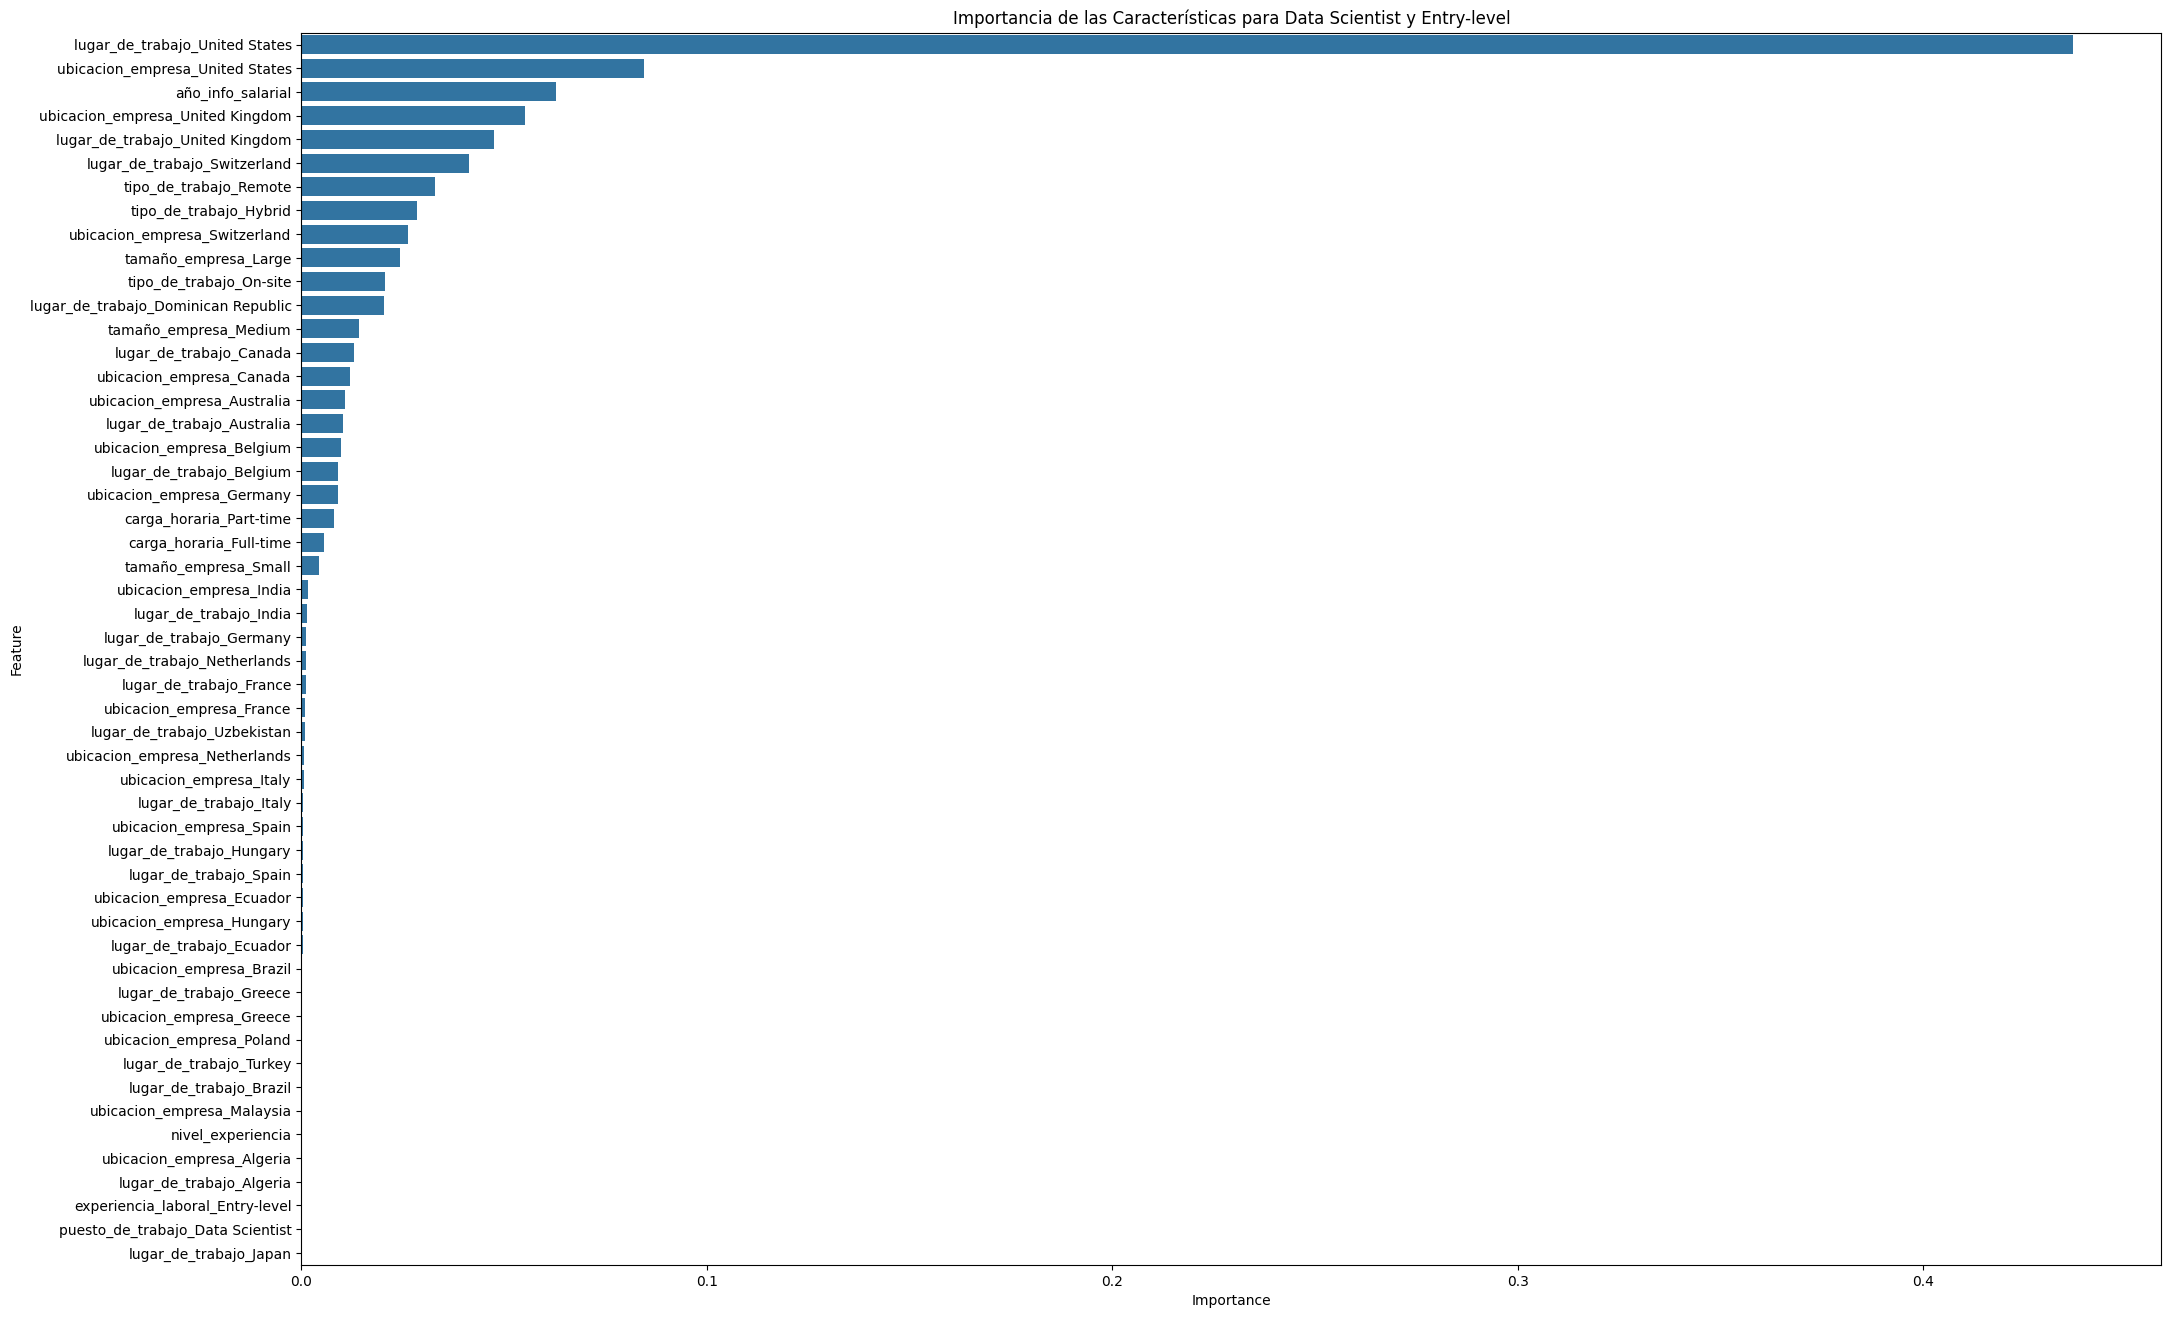

Características seleccionadas para Data Scientist y Entry-level: Index(['año_info_salarial', 'tipo_de_trabajo_Hybrid',
       'tipo_de_trabajo_On-site', 'tipo_de_trabajo_Remote',
       'lugar_de_trabajo_Dominican Republic', 'lugar_de_trabajo_Switzerland',
       'lugar_de_trabajo_United Kingdom', 'lugar_de_trabajo_United States',
       'ubicacion_empresa_Switzerland', 'ubicacion_empresa_United Kingdom',
       'ubicacion_empresa_United States', 'tamaño_empresa_Large'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# One-hot encoding para variables categóricas
categorical_features = ['puesto_de_trabajo', 'experiencia_laboral', 'carga_horaria', 'tipo_de_trabajo', 'lugar_de_trabajo', 'ubicacion_empresa', 'tamaño_empresa']
df_encoded = pd.get_dummies(df3, columns=categorical_features)

# Características y variable objetivo
X = df_encoded.drop('salario_en_dolares', axis=1)
y = df_encoded['salario_en_dolares']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un árbol de decisión para la selección de características
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtener las importancias de las características
importances = model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para mostrar las importancias
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de las características
plt.figure(figsize=(24, 16))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las Características para Data Scientist y Entry-level')
plt.show()

# Selección de características basada en la importancia
selector = SelectFromModel(model, prefit=True, threshold='mean')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Guardar las características seleccionadas para uso futuro
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas para Data Scientist y Entry-level:", selected_features)

Conclusión Basada en el Objetivo de Predecir Salarios Futuros

- Preparación de Datos

 El proceso asegura que solo se consideren los datos relevantes para "Data Scientists" en el nivel "Entry-level". Además, las variables categóricas se convierten en una forma que puede ser procesada por el modelo.

- Importancia de las Características

 Identificar y visualizar las características más importantes proporciona una comprensión de qué factores afectan más los salarios. Esto puede ser útil para tomar decisiones informadas sobre qué variables considerar para modelos futuros.

- Selección de Características

 Al reducir el número de características a las más importantes, el modelo puede ser más eficiente y efectivo. Esto también puede ayudar a evitar el sobreajuste y mejorar la generalización del modelo.

- Conclusión

Lo que podemos observar es que las variables mas importantes para nuestro objetivo son:

- Lugar de trabajo: Estados Unidos, Reino Unido y Alemania
- Info año salarial.
- Ubicación de la empresa: Suiza, Canada y Bélgica
- Tipo de trabajo: hibrido y presencial
- Tamaño de la empresa: mediana.
- Carga horaia: tiempo completo.

# Utilización de Random Forest para realizar la predicción

In [ ]:
# One-hot encoding para variables categóricas
categorical_features = ['puesto_de_trabajo', 'experiencia_laboral', 'carga_horaria', 'tipo_de_trabajo', 'lugar_de_trabajo', 'ubicacion_empresa', 'tamaño_empresa']
df_encoded = pd.get_dummies(df3, columns=categorical_features)

# Definir características y objetivo
X = df_encoded.drop(columns='salario_en_dolares')
y = df_encoded['salario_en_dolares']

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión de bosques aleatorios
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')

Error cuadrático medio (MSE): 1059480757.8549329
Coeficiente de determinación (R²): 0.44101404526780164


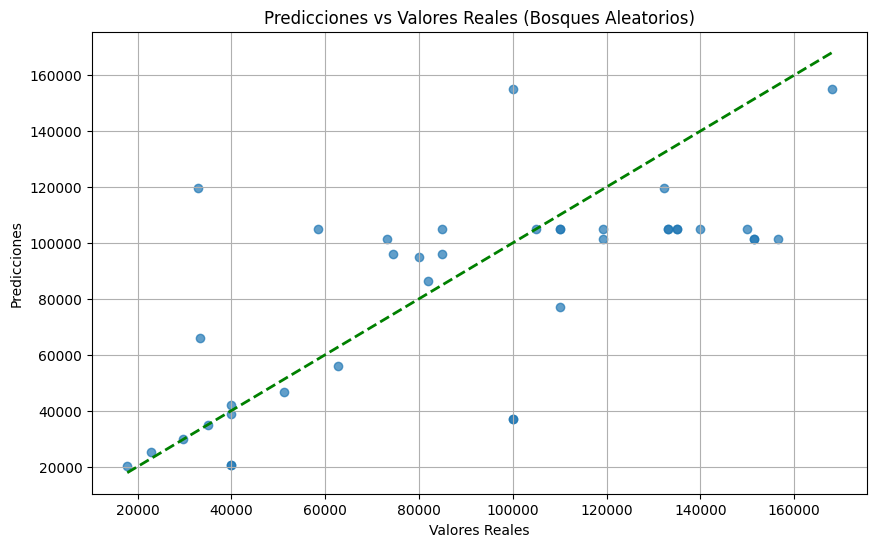

In [ ]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Bosques Aleatorios)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2)
plt.grid(True)
plt.show()

# Conclusión del objetivo:

- Este valor de MSE sugiere que, en promedio, las predicciones del modelo difieren significativamente de los valores reales. Dado que los salarios pueden tener una amplia variabilidad.

- Un R² en rste valor indica que aproximadamente el 44.1% de la variabilidad en los salarios en dólares puede ser explicada por las características que se han incluido en el modelo.

Modelo Moderado:

El modelo tiene un desempeño moderado en la predicción de salarios para Data Scientist en el nivel Entry-level, con un R² alrededor de 0.441. Deberia tenern mejores datos o mas variables para poder predecir mejor

Error en Predicciones:

El MSE relativamente alto indica que hay una cantidad significativa de error en las predicciones. Esto puede ser debido a variaciones en los salarios que no están bien capturadas por el modelo actual.